In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
f= pd.read_csv('data_cleaned/fbars.csv')

In [5]:
f

,best_bid_price,best_ask_price,best_bid_volume,best_ask_volume,bid_ask_spread,mid_price,VWAP,order_flow_imbalance,time,total_ask_volume,total_bid_volume,ask_moment_1,bid_moment_1,ask_moment_2,bid_moment_2,ask_moment_3,bid_moment_3,entropy_on_ask,entropy_on_bid
0,156,0,119999,0,-1,0,NaN,0.0,0,0,119999,NaN,-1.560000e+10,NaN,2.433600e+20,NaN,-3.796416e+30,NaN,0.000000
1,156,156,119999,500000,0,156,156.080645,0.0,0,500000,119999,1.561000e+10,-1.560000e+10,2.436721e+20,2.433600e+20,3.803721e+30,-3.796416e+30,0.000000,0.000000
2,156,156,119999,500000,0,156,156.080645,0.0,0,500000,249999,1.561000e+10,-1.554800e+10,2.436721e+20,2.417428e+20,3.803721e+30,-3.758694e+30,0.000000,0.998845
3,156,156,119999,500000,0,156,156.080645,0.0,0,500000,249999,1.561000e+10,-1.554800e+10,2.436721e+20,2.417428e+20,3.803721e+30,-3.758694e+30,0.000000,0.998845
4,156,156,119999,500000,0,156,156.080645,0.0,0,500000,249999,1.561000e+10,-1.554800e+10,2.436721e+20,2.417428e+20,3.803721e+30,-3.758694e+30,0.000000,0.998845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551624,157,157,700000,700000,0,157,157.540000,0.0,7172,398209984,867209975,1.982942e+10,-1.305955e+10,4.334644e+20,1.785587e+20,1.413055e+31,-2.508170e+30,6.432702,7.297948
1551625,157,157,700000,700000,0,157,157.540000,0.0,7172,398209984,867209975,1.982942e+10,-1.305955e+10,4.334644e+20,1.785587e+20,1.413055e+31,-2.508170e+30,6.432702,7.297948
1551626,157,157,700000,700000,0,157,157.540000,0.0,7172,398209984,867859975,1.982942e+10,-1.306133e+10,4.334644e+20,1.786033e+20,1.413055e+31,-2.509044e+30,6.432702,7.301338
1551627,157,157,700000,700000,0,157,157.540000,0.0,7172,398209984,867859975,1.982942e+10,-1.306133e+10,4.334644e+20,1.786033e+20,1.413055e+31,-2.509044e+30,6.432702,7.301338


## loooking around the df just to get an idea 

In [6]:
df = pd.read_csv('data_cleaned/features.csv')
print(df.columns)

Index(['VWAP', 'ask_moment_1', 'ask_moment_2', 'ask_moment_3',
       'best_ask_price', 'best_ask_volume', 'best_bid_price',
       'best_bid_volume', 'bid_ask_spread', 'bid_moment_1', 'bid_moment_2',
       'bid_moment_3', 'entropy_on_ask', 'entropy_on_bid', 'mid_price',
       'order_flow_imbalance', 'time', 'total_ask_volume', 'total_bid_volume'],
      dtype='object')


In [7]:
t = pd.read_csv('data_cleaned/tbars.csv')

In [8]:
t.head(10)

,AggressorTime,RequestTime,ExecID,LastQty,AggressorSide,LastPx,RestingHiddenQty,time
0,0,0,1586156537453686641,100000,49,15610000000,0,0
1,0,0,1586156537453742071,70000,49,15610000000,0,0
2,0,0,1586156537453768795,100000,49,15610000000,0,0
3,0,0,1586156537453804219,350000,49,15610000000,0,0
4,0,0,1586156537453838362,400000,49,15610000000,0,0
5,1586156537463083520,1586156537463071744,1586156537463087396,479999,49,15610000000,0,1
6,1586156537467941888,1586156537467931648,1586156537467947304,400000,50,15602000000,0,1
7,1586156537467965184,1586156537467952384,1586156537467990661,620000,50,15600000000,0,1
8,1586156537471388416,1586156537471375360,1586156537471392868,260000,49,15610000000,0,2
9,1586156537471458560,1586156537471441664,1586156537471461935,10000,49,15610000000,0,2


(0.0, 2000000.0)

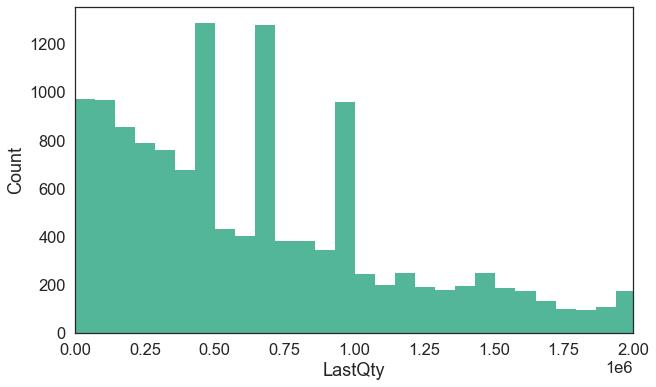

In [9]:
sns.set_theme(style="white", palette="Dark2", font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x='LastQty', data=t, ax=ax, linewidth=0)
ax.set_xlim(0, 2*10**6)
# ax.set_yscale('log')

<AxesSubplot:xlabel='time', ylabel='bid_ask_spread'>

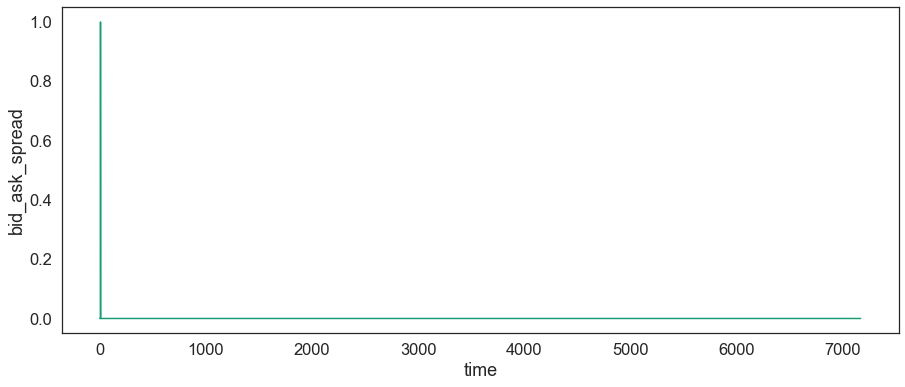

In [10]:
sns.set_theme(style="white", palette="Dark2", font_scale=1.5)
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='time', y ='bid_ask_spread', data=df, ax=ax)